# **PREDICTION OF** **BRAIN** **STROKE**
---



---



---



---



---



---






---
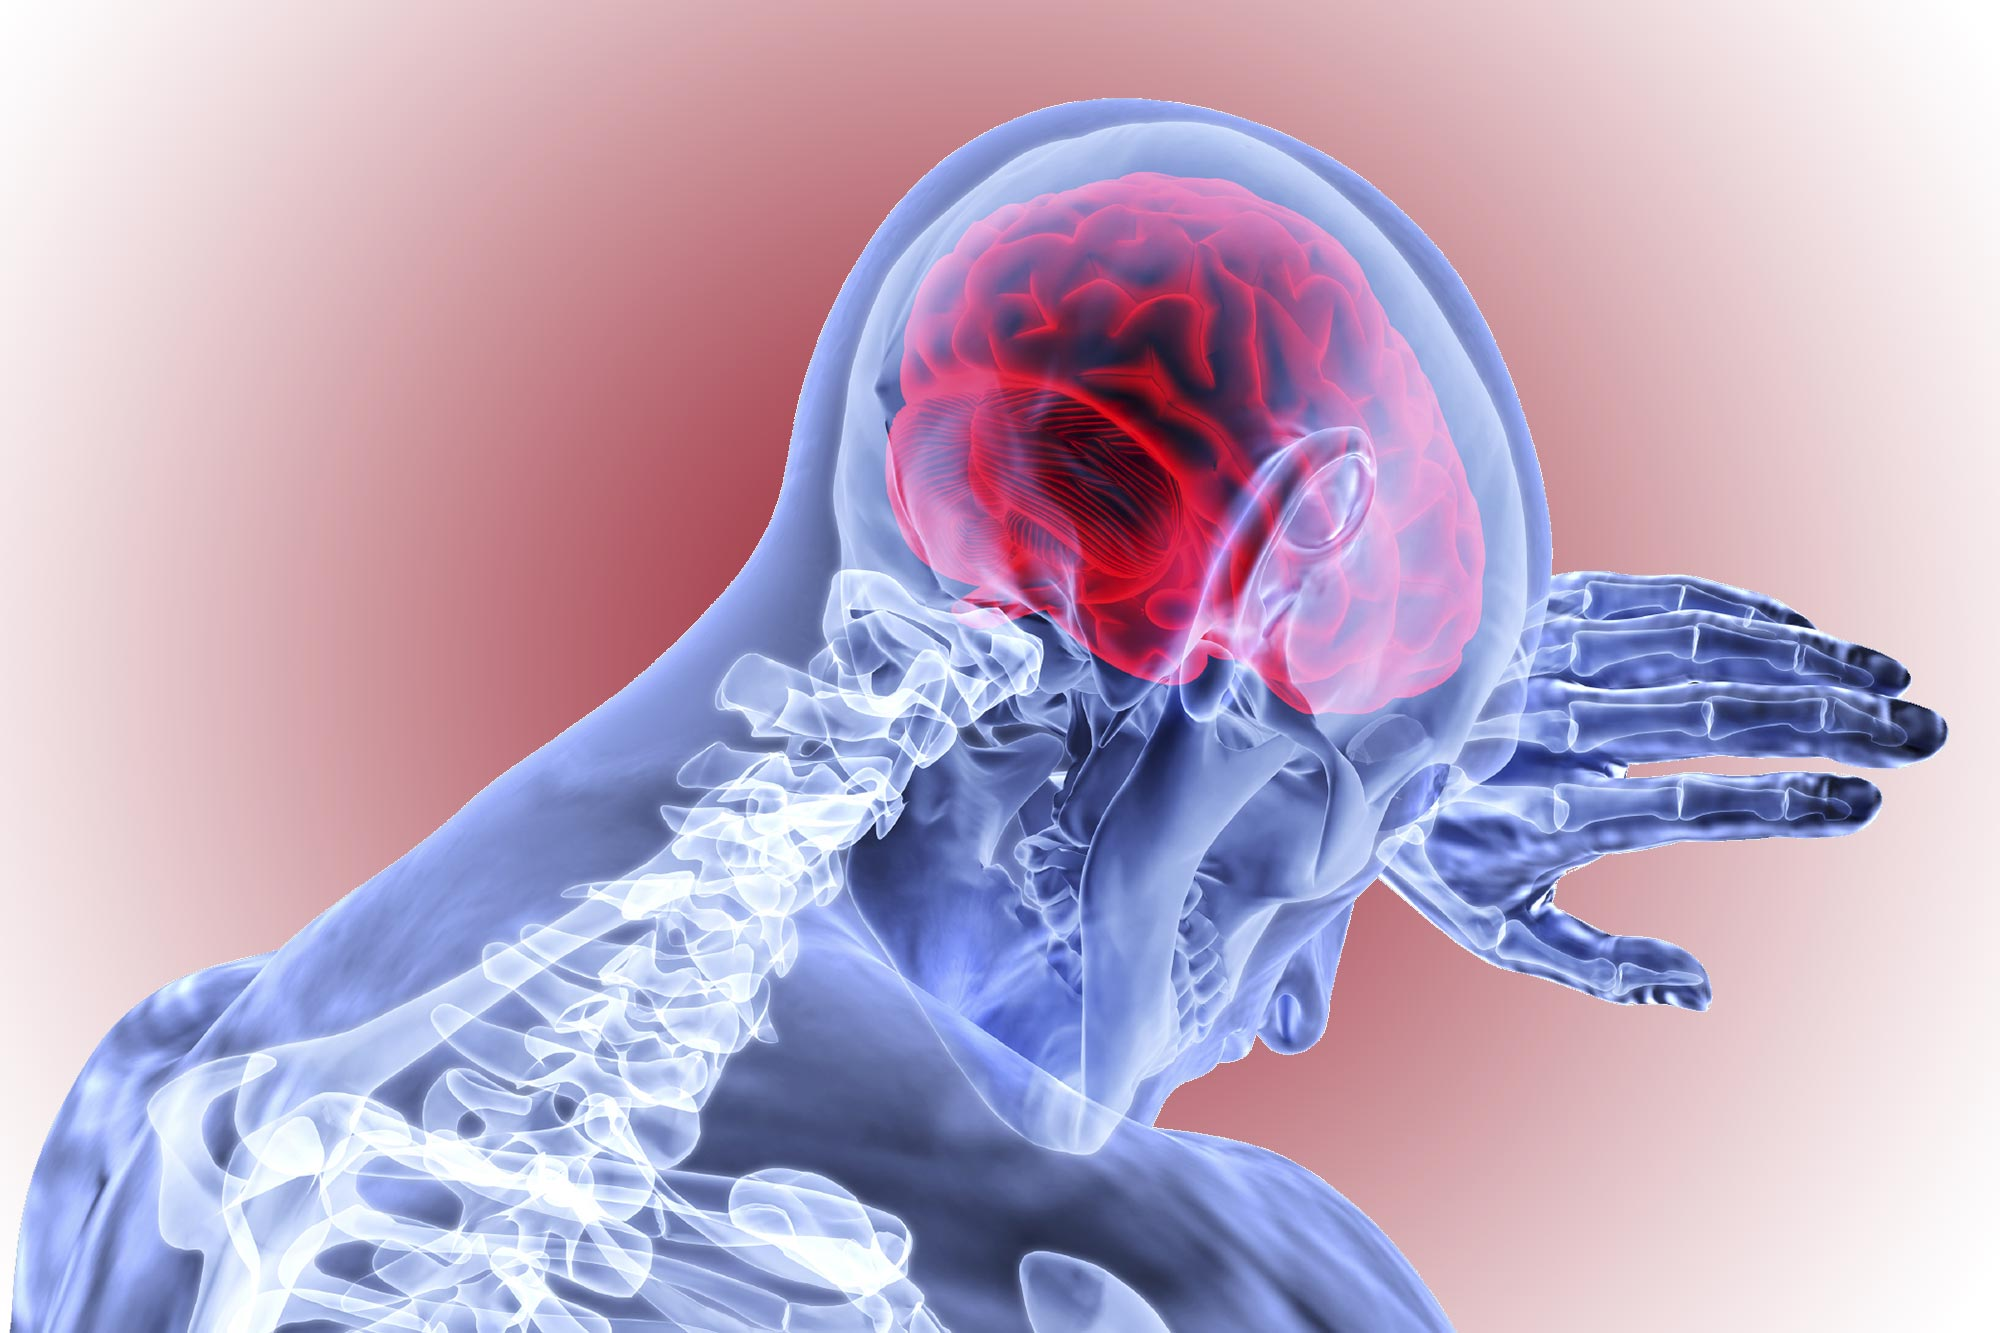






## **Description** **problem** **and** **data**

### **Problem**

A stroke, sometimes called a stroke, occurs when something blocks the blood flow to part of the brain or when a blood vessel in the brain bursts. In both cases, parts of the brain are damaged or die. A stroke can cause permanent brain damage, long-term disability or even death. There are two main causes of stroke: a blocked artery (ischemic stroke) or a leaking or burst blood vessel (hemorrhagic stroke). Some people may only have a temporary disruption of blood flow to the brain, known as a transient ischemic attack (TIA), that causes no permanent symptoms. When to see a doctor? Stroke treatment that works best is only available if the stroke is recognized and diagnosed within 3 hours of the first symptoms. Stroke patients may not be eligible for these if they do not get to hospital in time.

If you think someone is having a stroke, take F.A.S.T. and do the following test:

F—face: Ask the person to smile. Does one side of your face droop?

A—Hands: Ask the person to raise both hands. Is one hand sliding down?

S—Speech: Ask the person to repeat a simple phrase. Is speech slurred or strange?

T—Time: If you notice any of these signs, call 9-1-1 immediately.

According to the World Health Organization (WHO), stroke is the second leading cause of death in the world and is responsible for approximately 11% of all deaths. This data set is used to predict whether a patient is likely to have a stroke based on input parameters such as gender, age, various diseases and smoking status. Each row in the data provides relevant information about the patient.

### **Data**

* id: unique identifier


* gender: "Male", "Female" or "Other"
* age: age of the patient

* hypertension: 0 if the patient does not have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if patient has no heart disease, 1 if patient has heart disease
* ever_married: "No" or "Yes"


* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"


* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood


* bmi: body mass index

* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
* stroke: 1 if the patient had a stroke or 0 if not

Note: "Unknown" in smoking_status means that information is not available for this patient




















## **Analiza** **in** **pregled** **podatkov**

---



In [ ]:
#link to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv', sep=',', decimal='.') #Read csv
df.head(n=5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.reset_index(drop = True).head()   # We delete the id because it is not an important data for the analysis
df.drop('id', axis=1, inplace=True)

In [ ]:
print(f"Null vrednosti :") #check if there are any missing data values
print(df.isnull().sum())

Null vrednosti :
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='median') #replace all null values with the average value of the column
df['bmi']= imputer.fit_transform(df['bmi'].values.reshape(-1,1))[:,0]


In [ ]:
def check_data(dataframe):
    print(20*"-" + "Informacije".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "Prvi pet vrstici".center(10) + 20*"-")
    print(dataframe.head(n=5))
    print("\n" + 20 * "-" + "Zadni 5 vrstici".center(10) + 20 * "-")
    print(dataframe.tail(n=5))
    print("\n" + 20 * "-" + "Null vrednosti".center(10) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 20 * "-" + "Opis podatki".center(20) + 20 * "-")
    print(dataframe.describe().T)
    print("\n" + 20 * "-" + "Podvojeni podatki".center(20) + 20 * "-")
    df.drop_duplicates(inplace=True)                                        #Delete duplicate data
    duplicated = len(df[df.duplicated()])
    print(f'Obstaja {duplicated} podvojenih vrstic')
check_data(df)

--------------------    Informacije     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None
--------------------     Data Shape     --------------------
(5110, 11)

--------------------Prvi pet vrstici--------------------
   gender

In [ ]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)   #because it has only one instance of is other and that is too few, we can see it as an anomaly and delete it
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [ ]:
df["work_type"].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df["stroke"].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [ ]:
numeric_columns = df._get_numeric_data().columns.values.tolist()
print(numeric_columns)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


## **Visualizations** of **data**

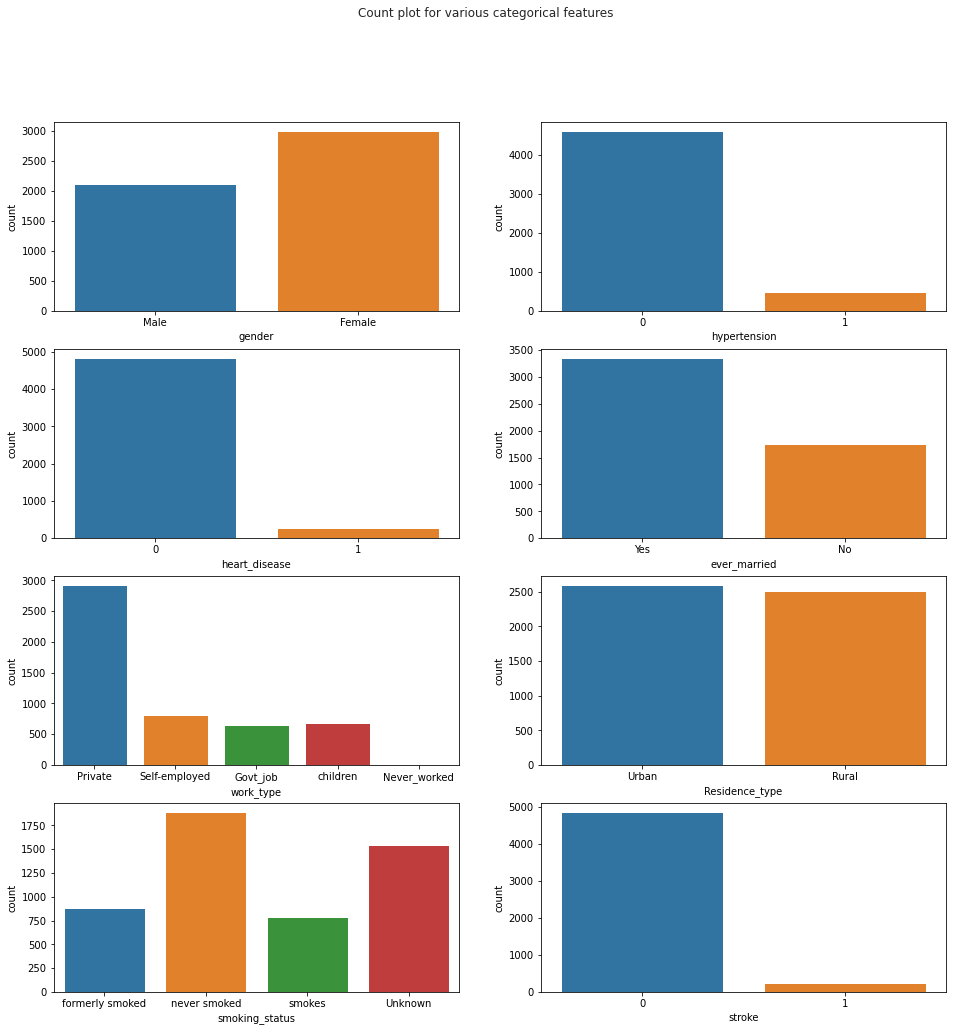

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualization of categorical data and their values

fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Count plot for various categorical features")


sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

plt.show()

We visualize each attribute its value and how much data it has
We find that in: heart disease, hypertension and stroke there is too much difference between two values.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

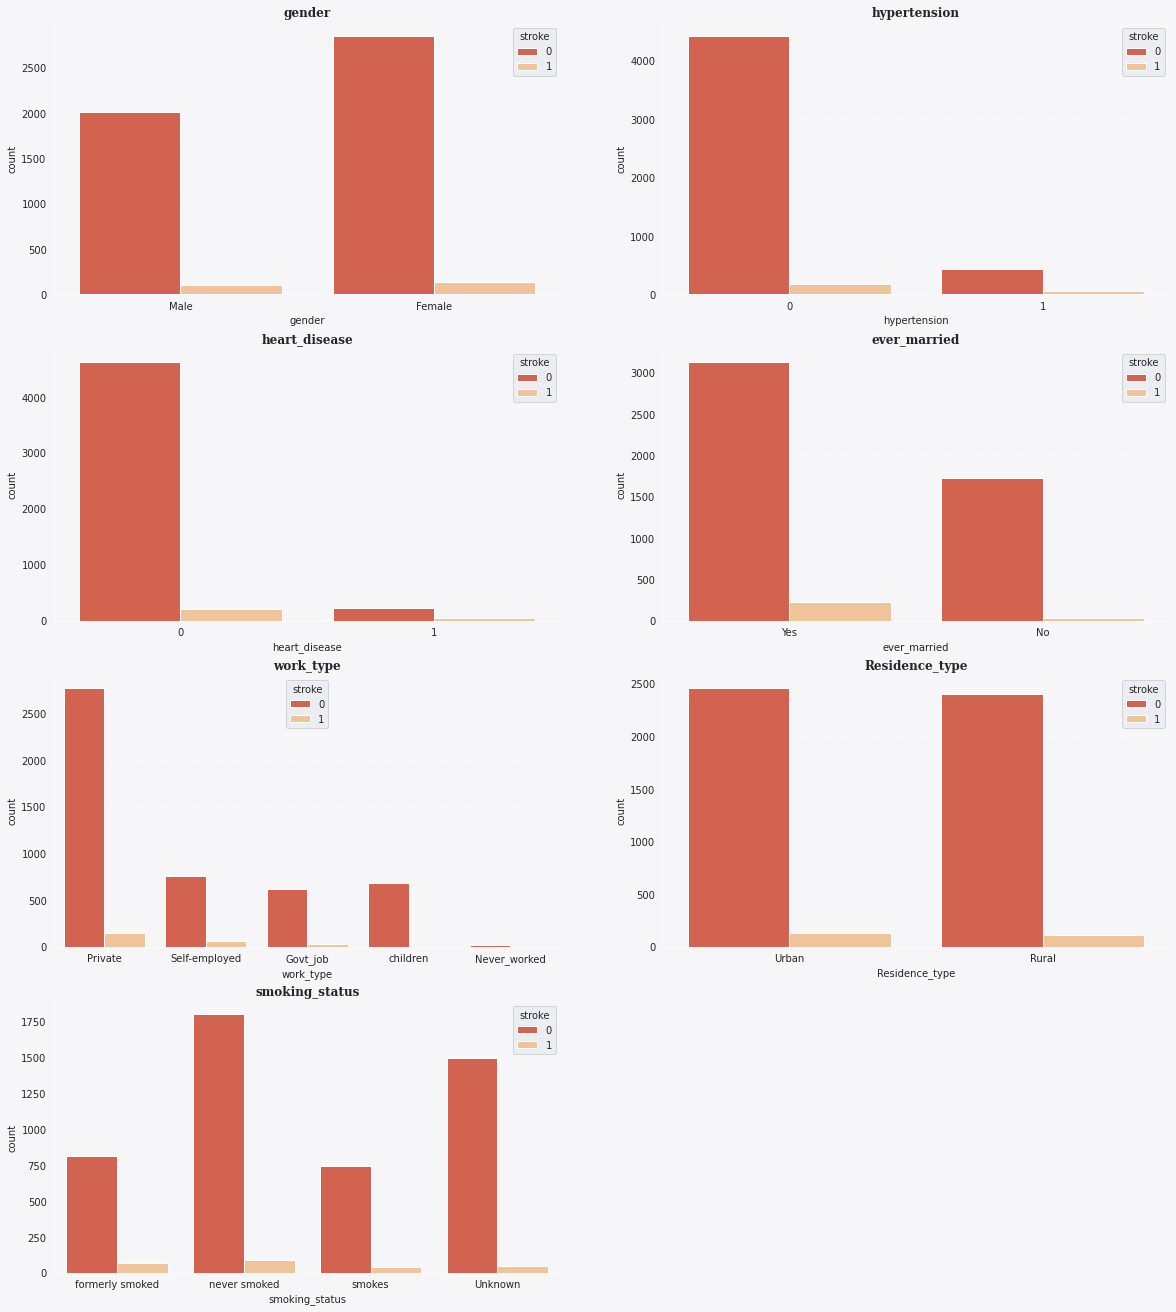

In [ ]:
data_cat=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type',
                       'smoking_status']]

#connection between stroke and other categorical data

fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_cat[val],palette='OrRd_r',hue=df['stroke'])

* Married people are much more likely to show signs of stroke than unmarried people.
* Private sector workers seem to have more strokes than other types of employment.

* Place of residence does not play a significant role in stroke.

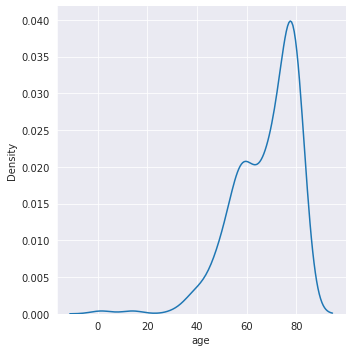

In [ ]:
# Connection between stroke and age in positive profession:

stroke = df[df['stroke']==1]
sns.displot(stroke.age, kind='kde')
plt.show()

We can conclude that people who mostly have strokes are between 60-80 years old

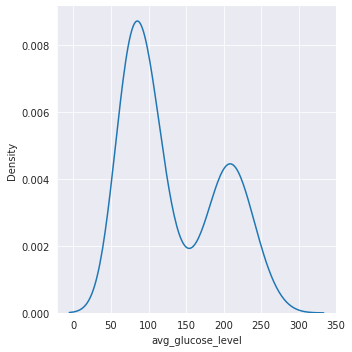

In [ ]:
# The connection between glucose and stroke:

stroke = df[df['stroke']==1]
sns.displot(stroke.avg_glucose_level, kind='kde')
plt.show()

People who have glucose between 50-100 have the highest chance of having a stroke

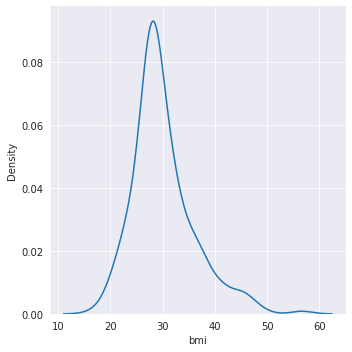

In [ ]:
# The connection between bmi and i storke:

stroke = df[df['stroke']==1]
sns.displot(stroke.bmi, kind='kde')
plt.show()

People between 20-40 bmi have the possibility of stroke

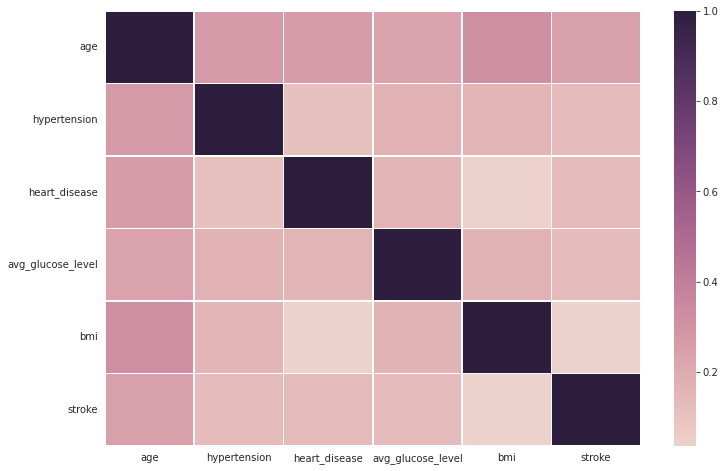

In [ ]:
fig = plt.figure(figsize=(12,8))
corr = df.corr()
ax= sns.heatmap(corr, linewidths=.5, cmap=sns.cubehelix_palette(as_cmap=True))

From the graph made above, we can conclude that the data are not too dependent on each other. We have more light than dark colors. Dark means that they are more dependent on each other, but light means the opposite.

## **Preprocessing** **data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

#It turns out that when we have two values for some data that are nominal, it is better to use an encoder to convert them into numbers
nominalni_brez_izhod=['gender','ever_married','Residence_type']

for parameter in nominalni_brez_izhod:
    df[parameter] = LabelEncoder().fit_transform(df[parameter])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [ ]:
#For nominal data that have several possible values, it is better to use a dummy

nominalni_brez_izhod_1= ['work_type', 'smoking_status' ]
df = pd.get_dummies(df, columns=nominalni_brez_izhod_1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.1,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

#We standardize numerical data
stevilski=['age', 'avg_glucose_level', 'bmi']
df[stevilski] = StandardScaler().fit_transform(df[stevilski])
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1.051242,0,1,1,1,2.706450,1.004893,1,0,0,1,0,0,0,1,0,0
1,0,0.785889,0,0,1,0,2.121652,-0.099142,1,0,0,0,1,0,0,0,1,0
2,1,1.626174,0,1,1,0,-0.004867,0.472358,1,0,0,1,0,0,0,0,1,0
3,0,0.255182,0,0,1,1,1.437473,0.719142,1,0,0,1,0,0,0,0,0,1
4,0,1.581949,1,0,1,0,1.501297,-0.631677,1,0,0,0,1,0,0,0,1,0


In [ ]:
koloni= df.columns.tolist()

column_headers_brez_izhod= np.delete(koloni, 8)
column_headers_brez_izhod


array(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='<U30')

## **Machine Learning Method(s)**

In [ ]:
# Let's import:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler

In [ ]:
y = df["stroke"]
X = df.drop(["stroke"], axis=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

klasifikatorji = [] # Seznam kalsifikatorjev
klasifikatorji.append(DecisionTreeClassifier())
klasifikatorji.append(LogisticRegression(max_iter=3000))
klasifikatorji.append(LinearSVC())
klasifikatorji.append(KNeighborsClassifier())
klasifikatorji.append(GaussianNB())
klasifikatorji.append(RandomForestClassifier())
klasifikatorji.append(ExtraTreesClassifier())
klasifikatorji.append(AdaBoostClassifier())
klasifikatorji.append(GradientBoostingClassifier())

print(len(klasifikatorji))

9


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE

arr = []

#transform dataset
oversample=SMOTE()
X,y=oversample.fit_resample(X,y)


for klasifikator in klasifikatorji:
    kfold = StratifiedKFold(n_splits=8, random_state=123, shuffle=True) # Stratified KFold for verification with ten cuts
     cv_results = cross_val_score(klasifikator, # Classifier model
                                    X, # Input input data
                                    y, # What is the result (class)
                                    cv=kfold, # Number of cuts
                                    scoring= 'f1') # Scoring metric

    arr.append(cv_rezultati.mean())




    print(f'{type(klasifikator).__name__ : >100}: {cv_rezultati.mean():1.9f}')


                                                                              DecisionTreeClassifier: 0.905242226
                                                                                  LogisticRegression: 0.816398290
                                                                                           LinearSVC: 0.817554745
                                                                                KNeighborsClassifier: 0.908768005
                                                                                          GaussianNB: 0.725455787
                                                                              RandomForestClassifier: 0.948951149
                                                                                ExtraTreesClassifier: 0.947610727
                                                                                  AdaBoostClassifier: 0.836620284
                                                                          GradientBoosti

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from imblearn.over_sampling import SMOTE




x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 1500, num = 1498)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 50, num = 48)]
criterion = ["gini", "entropy"]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion
               }
print(param_grid)

rf_Model = RandomForestClassifier()
kfold = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = kfold, verbose=2, n_jobs = 4, scoring= 'f1')


rf_RandomGrid.fit(x_train, y_train)

{'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
        

In [ ]:
print('Best hyperparameters are: '+str(rf_RandomGrid.best_params_))
print('Best score is: '+str(rf_RandomGrid.best_score_))

Best hyperparameters are: {'n_estimators': 516, 'max_features': 'log2', 'max_depth': 38, 'criterion': 'gini'}
Best score is: 0.9357570261204368


In [ ]:
print (f'Train F1 - : {rf_RandomGrid.score(x_train,y_train):.3f}')
print (f'Test F1 - : {rf_RandomGrid.score(x_test,y_test):.3f}')

Train F1 - : 1.000
Test F1 - : 0.941


In [ ]:
#se enkrat izvedemo model so vse najboljse parametre ki nam je gridSearch generiral

rfc1=RandomForestClassifier(n_estimators=970, max_features='auto', max_depth= 28, criterion='gini')

In [ ]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=28, n_estimators=970)

In [ ]:
pred=rfc1.predict(x_test)

In [ ]:
from sklearn import metrics
#Izpisemo tocnost napovedi
print("Accuracy:", metrics.accuracy_score(y_test,pred))
print('Precision:', metrics.precision_score(y_test,pred, average=None)) # Za vsak razred izpiše precision
print('Recall: ', metrics.recall_score(y_test,pred, average=None)) #Izpisemo Recall
print ("F1-score: " , metrics.f1_score(y_test,pred, average=None))#F1-score

Accuracy: 0.9399862825788752
Precision: [0.97381818 0.90979883]
Recall:  [0.90595399 0.97496523]
F1-score:  [0.93866106 0.94125545]


## **Analysis of results**

**The data and attributes contained in our data set are quite sufficient and are among the most important to determine stroke.**

Both with the help of visualization and data review, we noticed that the result, that is **output column, has unbalanced data**.

That's why I decided to use the **SMOTE** technique, which is a technique that adds new instances of this class that has fewer instances.
> **How does SMOTE work? **

For a random sample from a class with fewer samples, we calculate the distance from this sample to knn nearest neighbors. And the resulting result doubles[0,1].

After applying the technique to the same data, I ran several classifiers and selected the classifier with a better result for the F1-score metric.

One of the best turns out to be a random forest.
With the help of GridSearch, I looked for which combination of random forest parameters would give the best results.
Based on the ego model, I calculated other measurements, the results of which turned out to be quite good.